# SCALING EXERCISES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
# import acquire
# import prepare
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
# importing my personal wrangle module
import wrangle

In [2]:
# Acquiring the data using the above module
zillow = wrangle.get_zillow_data()

In [3]:
# Using my wrangle module to clean and prep the data. NaNs are dropped; so are outliers. 
# In the end, I added an 'age' column and deleted the yearbuilt column (which was more like a categorical variable)
# No outliers were removed from year built, age, or fips
zillow = wrangle.clean_and_prep_data(zillow)

In [4]:
zillow = wrangle.encode_zillow(zillow)
zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,age,LA,Orange,Ventura
6,3.0,4.0,1620.0,847770.0,10244.94,10,1,0,0
7,3.0,2.0,2077.0,646760.0,7924.68,95,1,0,0
18,3.0,1.0,1244.0,169471.0,2532.88,71,1,0,0
19,3.0,2.0,1300.0,233266.0,3110.99,71,1,0,0
20,3.0,2.0,1222.0,290492.0,3870.25,70,1,0,0


In [12]:
zillow.columns

Index(['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura'],
      dtype='object')

In [10]:
train, validate, test = wrangle.split_zillow(zillow)
train.shape, validate.shape, test.shape

((1038399, 9), (445029, 9), (370858, 9))

# 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .



In [23]:
# 1. create the object
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
min_max_scaler.fit(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])

# 3. use the object (use the min, max to do the transformation)

min_max_scaled_zillow = min_max_scaler.transform(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])
min_max_scaled_zillow = pd.DataFrame(min_max_scaled_zillow, columns=['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura'])
min_max_scaled_zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,age,LA,Orange,Ventura
0,0.333333,0.500000,0.578221,0.402894,0.374393,0.158470,0.0,1.0,0.0
1,0.666667,0.333333,0.550925,0.417069,0.476397,0.311475,1.0,0.0,0.0
2,0.000000,0.333333,0.293513,0.220804,0.242438,0.366120,1.0,0.0,0.0
3,0.333333,0.333333,0.432345,0.066427,0.098085,0.333333,0.0,1.0,0.0
4,0.333333,0.333333,0.358086,0.274273,0.323108,0.355191,1.0,0.0,0.0


## This is the visualization for the min/max scaled data. It looks identical:

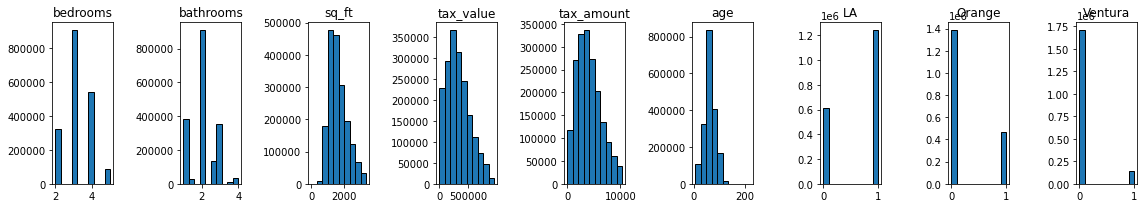

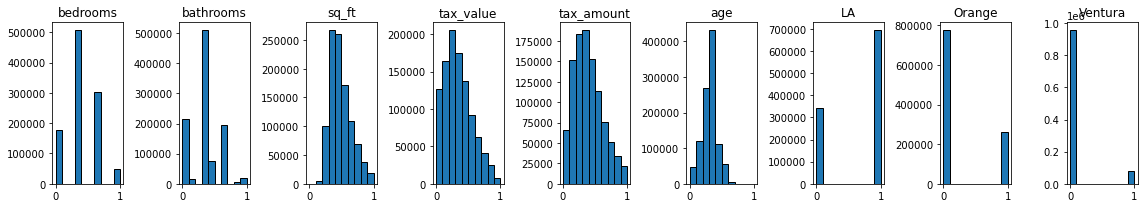

In [22]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
plt.figure(figsize=(16, 3))

,

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    min_max_scaled_zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

In [26]:
# 1. create the object
standard_scaler = sklearn.preprocessing.StandardScaler()

# 2. fit the object (learn the min and max value)
standard_scaler.fit(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])

# 3. use the object (use the min, max to do the transformation)

standard_scaled_zillow = standard_scaler.transform(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])
standard_scaled_zillow = pd.DataFrame(standard_scaled_zillow, columns=['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura'])
standard_scaled_zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,age,LA,Orange,Ventura
0,-0.275398,0.631633,0.563909,0.278310,-0.076966,-1.342267,-1.423150,1.720364,-0.290843
1,1.005148,-0.075403,0.398948,0.346114,0.394678,0.021556,0.702667,-0.581272,-0.290843
2,-1.555943,-0.075403,-1.156653,-0.592688,-0.687096,0.508636,0.702667,-0.581272,-0.290843
3,-0.275398,-0.075403,-0.317657,-1.331119,-1.354547,0.216388,-1.423150,1.720364,-0.290843
4,-0.275398,-0.075403,-0.766422,-0.336928,-0.314095,0.411220,0.702667,-0.581272,-0.290843


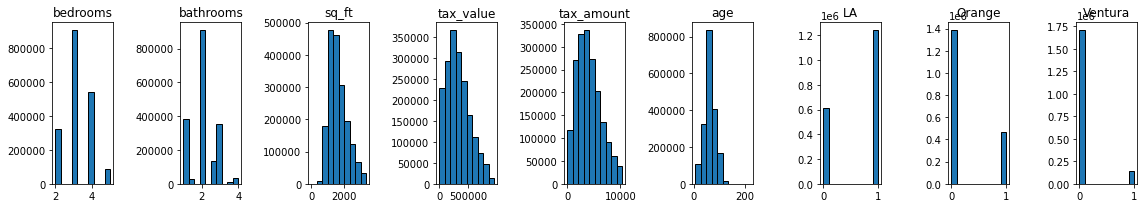

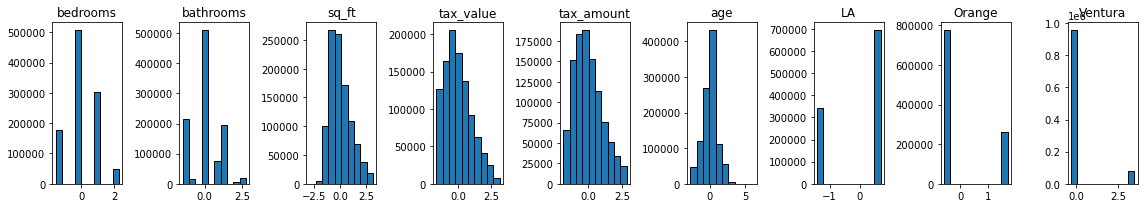

In [27]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
plt.figure(figsize=(16, 3))

,

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    standard_scaled_zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

In [28]:
# 1. create the object
robust_scaler = sklearn.preprocessing.RobustScaler()

# 2. fit the object (learn the min and max value)
robust_scaler.fit(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])

# 3. use the object (use the min, max to do the transformation)

robust_scaled_zillow = robust_scaler.transform(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])
robust_scaled_zillow = pd.DataFrame(robust_scaled_zillow, columns=['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura'])
robust_scaled_zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,age,LA,Orange,Ventura
0,0.0,1.0,0.560847,0.311324,0.048283,-1.304348,-1.0,1.0,0.0
1,1.0,0.0,0.437831,0.359757,0.387378,-0.086957,0.0,0.0,0.0
2,-1.0,0.0,-0.722222,-0.310829,-0.390378,0.347826,0.0,0.0,0.0
3,0.0,0.0,-0.096561,-0.838290,-0.870251,0.086957,-1.0,1.0,0.0
4,0.0,0.0,-0.431217,-0.128140,-0.122204,0.260870,0.0,0.0,0.0


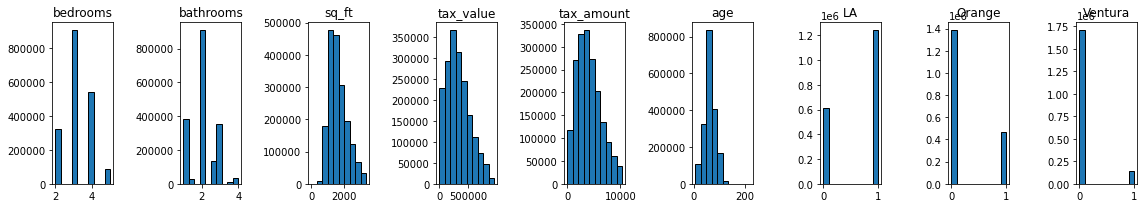

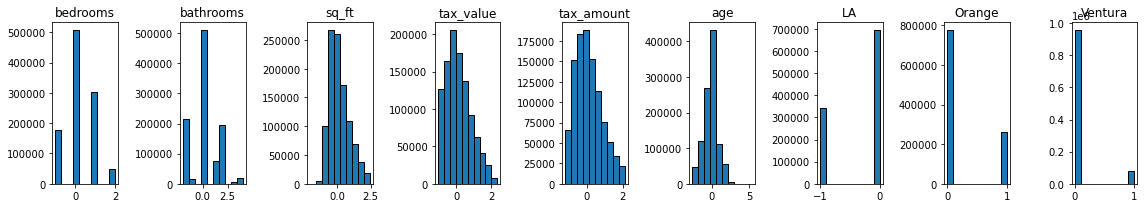

In [30]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
plt.figure(figsize=(16, 3))

,

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    robust_scaled_zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

In [31]:
# 1. create the object
quantile_scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. fit the object (learn the min and max value)
quantile_scaler.fit(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])

# 3. use the object (use the min, max to do the transformation)

quantile_scaled_zillow = quantile_scaler.transform(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])
quantile_scaled_zillow = pd.DataFrame(quantile_scaled_zillow, columns=['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura'])
quantile_scaled_zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,age,LA,Orange,Ventura
0,-0.207223,0.678433,0.653894,0.390604,0.066220,-1.236652,-5.199338,5.199338,-5.199338
1,0.868016,-0.075345,0.529301,0.445366,0.478172,-0.086674,5.199338,-5.199338,-5.199338
2,-5.199338,-0.075345,-1.349498,-0.461514,-0.596068,0.692715,5.199338,-5.199338,-5.199338
3,-0.207223,-0.075345,-0.137177,-1.587836,-1.555312,0.172731,-5.199338,5.199338,-5.199338
4,-0.207223,-0.075345,-0.702315,-0.173934,-0.173190,0.513491,5.199338,-5.199338,-5.199338


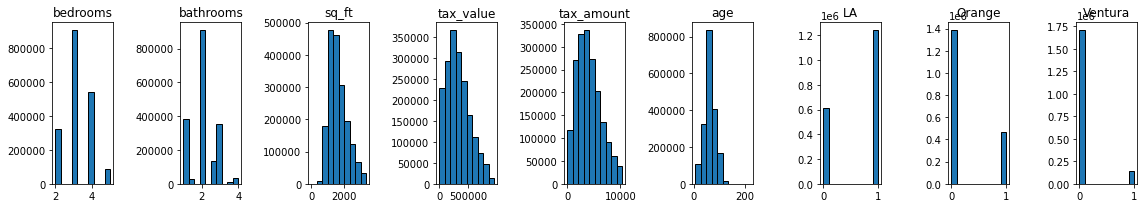

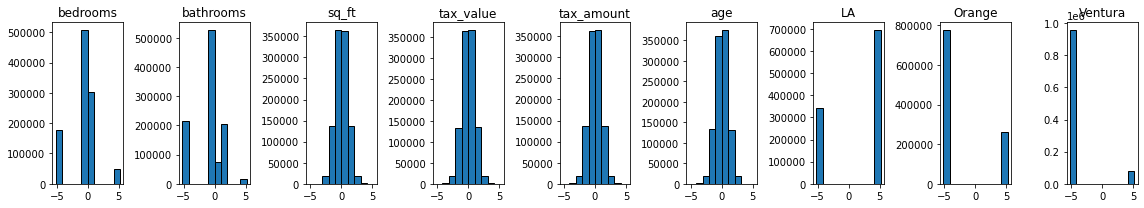

In [32]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
plt.figure(figsize=(16, 3))

,

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    quantile_scaled_zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [36]:
min_max_scaled_zillow.columns

Index(['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura'],
      dtype='object')

In [46]:
# returns floats now
inverse_test = pd.DataFrame(min_max_scaler.inverse_transform(min_max_scaled_zillow), columns=['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura'])
inverse_test.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,age,LA,Orange,Ventura
0,3.0,2.5,1971.0,383099.0,3895.40,34.0,0.0,1.0,0.0
1,4.0,2.0,1878.0,396577.0,4952.22,62.0,1.0,0.0,0.0
2,2.0,2.0,1001.0,209965.0,2528.27,72.0,1.0,0.0,0.0
3,3.0,2.0,1474.0,63182.0,1032.70,66.0,0.0,1.0,0.0
4,3.0,2.0,1221.0,260804.0,3364.06,70.0,1.0,0.0,0.0


In [44]:
zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,age,LA,Orange,Ventura
6,3.0,4.0,1620.0,847770.0,10244.94,10,1,0,0
7,3.0,2.0,2077.0,646760.0,7924.68,95,1,0,0
18,3.0,1.0,1244.0,169471.0,2532.88,71,1,0,0
19,3.0,2.0,1300.0,233266.0,3110.99,71,1,0,0
20,3.0,2.0,1222.0,290492.0,3870.25,70,1,0,0


## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling. (see above)

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [47]:
# 1. create the object
quantile_scaler2 = sklearn.preprocessing.QuantileTransformer()

# 2. fit the object (learn the min and max value)
quantile_scaler2.fit(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])

# 3. use the object (use the min, max to do the transformation)

quantile_scaled_zillow2 = quantile_scaler2.transform(train[['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura']])
quantile_scaled_zillow2 = pd.DataFrame(quantile_scaled_zillow2, columns=['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age',
       'LA', 'Orange', 'Ventura'])
quantile_scaled_zillow2.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,age,LA,Orange,Ventura
0,0.416416,0.750751,0.742075,0.652976,0.524700,0.108609,0.0,1.0,0.0
1,0.805806,0.470470,0.701368,0.674021,0.683754,0.463463,1.0,0.0,0.0
2,0.000000,0.470470,0.089089,0.320300,0.275440,0.755756,1.0,0.0,0.0
3,0.416416,0.470470,0.446446,0.055605,0.060601,0.568068,0.0,1.0,0.0
4,0.416416,0.470470,0.243744,0.427926,0.430505,0.695195,1.0,0.0,0.0


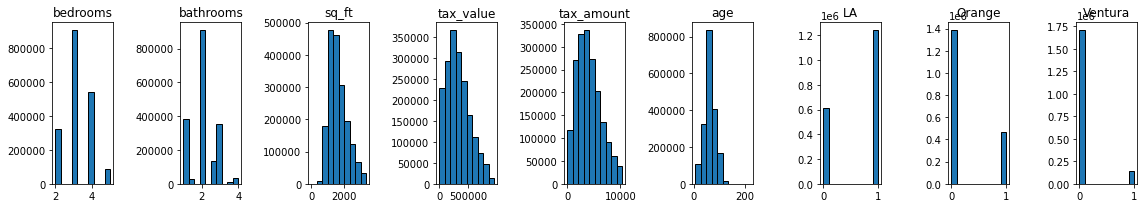

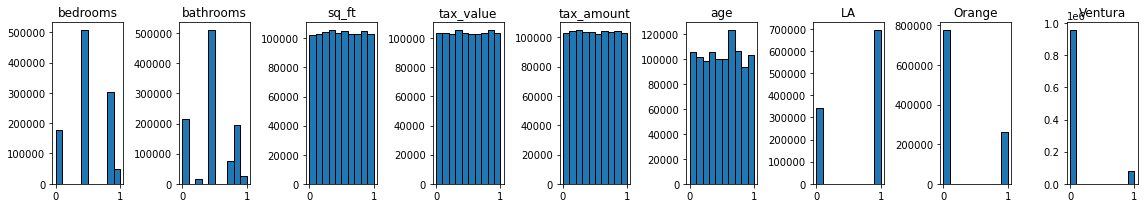

In [48]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
plt.figure(figsize=(16, 3))

,

# List of columns
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'age','LA', 'Orange', 'Ventura']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,9, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    quantile_scaled_zillow2[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!